# Arboles de decisión en Machine Learning

Los árboles de decisión son un algoritmo de aprendizaje supervisado utilizado en machine learning para tareas de clasificación y regresión. Este modelo organiza los datos en una estructura jerárquica similar a un árbol, donde cada nodo interno representa una decisión sobre una característica, y las hojas contienen el resultado final (la clase o el valor a predecir).

El árbol comienza en un nodo raíz y recursivamente divide los datos en función de las características más relevantes. En cada paso, el algoritmo selecciona la característica que mejor separa los datos, utilizando criterios como la entropía o el índice de Gini (para clasificación) o varianza (para regresión). Estas divisiones continúan hasta que se alcanza un umbral de pureza o un número máximo de niveles, lo que evita el sobreajuste.

Una de las principales ventajas de los árboles de decisión es que son fáciles de interpretar, ya que las decisiones se pueden visualizar como un conjunto de reglas. Además, no requieren que los datos estén normalizados o escalados. Sin embargo, pueden ser propensos al sobreajuste si no se controlan adecuadamente la profundidad del árbol o el tamaño mínimo de las hojas.

Para mejorar su rendimiento y estabilidad, se utilizan enfoques como los bosques aleatorios (Random Forests) y el boosting, que combinan varios árboles de decisión para obtener predicciones más robustas y precisas. Estos métodos son populares en problemas de clasificación y regresión debido a su efectividad y facilidad de implementación.

# Dataset Vinos

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2

    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Magnesium:                    70.0 162.0    99.7  14.3
    Total Phenols:                0.98  3.88    2.29  0.63
    Flavanoids:                   0.34  5.08    2.03  1.00
    Nonflavanoid Phenols:         0.13  0.66    0.36  0.12
    Proanthocyanins:              0.41  3.58    1.59  0.57
    Colour Intensity:              1.3  13.0     5.1   2.3
    Hue:                          0.48  1.71    0.96  0.23
    OD280/OD315 of diluted wines: 1.27  4.00    2.61  0.71
    Proline:                       278  1680     746   315
    ============================= ==== ===== ======= =====

    :Missing Attribute Values: None
    :Class Distribution: class_0 (59), class_1 (71), class_2 (48)
    :Creator: R.A. Fisher
    :Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
    :Date: July, 1988

This is a copy of UCI ML Wine recognition datasets.
https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

The data is the results of a chemical analysis of wines grown in the same
region in Italy by three different cultivators. There are thirteen different
measurements taken for different constituents found in the three types of
wine.

Original Owners:

Forina, M. et al, PARVUS -
An Extendible Package for Data Exploration, Classification and Correlation.
Institute of Pharmaceutical and Food Analysis and Technologies,
Via Brigata Salerno, 16147 Genoa, Italy.

Citation:

Lichman, M. (2013). UCI Machine Learning Repository
[https://archive.ics.uci.edu/ml]. Irvine, CA: University of California,
School of Information and Computer Science.

.. topic:: References

  (1) S. Aeberhard, D. Coomans and O. de Vel,
  Comparison of Classifiers in High Dimensional Settings,
  Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of  
  Mathematics and Statistics, James Cook University of North Queensland.
  (Also submitted to Technometrics).

  The data was used with many others for comparing various
  classifiers. The classes are separable, though only RDA
  has achieved 100% correct classification.
  (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))
  (All results using the leave-one-out technique)

  (2) S. Aeberhard, D. Coomans and O. de Vel,
  "THE CLASSIFICATION PERFORMANCE OF RDA"
  Tech. Rep. no. 92-01, (1992), Dept. of Computer Science and Dept. of
  Mathematics and Statistics, James Cook University of North Queensland.
  (Also submitted to Journal of Chemometrics).

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [3]:
vinos = pd.read_csv('sample_data/vino.csv')
vinos.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine Type
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,One
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,One
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,One
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,One
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,One


In [4]:
vinos['Wine Type'].unique()
vinos['Wine Type'].value_counts()

,count
Wine Type,
Two,71
One,59
Three,48


In [5]:
X = vinos.drop('Wine Type', axis=1)
y = vinos['Wine Type']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [37]:
arbol = DecisionTreeClassifier()
arbol.fit(X_train, y_train)
predicciones = arbol.predict(X_test)

In [38]:
print(classification_report(y_test,predicciones))
print(confusion_matrix(y_test,predicciones))

              precision    recall  f1-score   support

         One       0.91      0.91      0.91        11
       Three       0.78      1.00      0.88         7
         Two       0.94      0.83      0.88        18

    accuracy                           0.89        36
   macro avg       0.87      0.91      0.89        36
weighted avg       0.90      0.89      0.89        36

[[10  0  1]
 [ 0  7  0]
 [ 1  2 15]]


In [17]:
# Usar nombres de las columnas como features
feature_names = X.columns.tolist()

# Si las etiquetas son numéricas, puedes asignar nombres manualmente
# Por ejemplo, si `y` representa [0, 1, 2], puedes mapearlo a nombres como:
target_names = vinos['Wine Type'].unique()


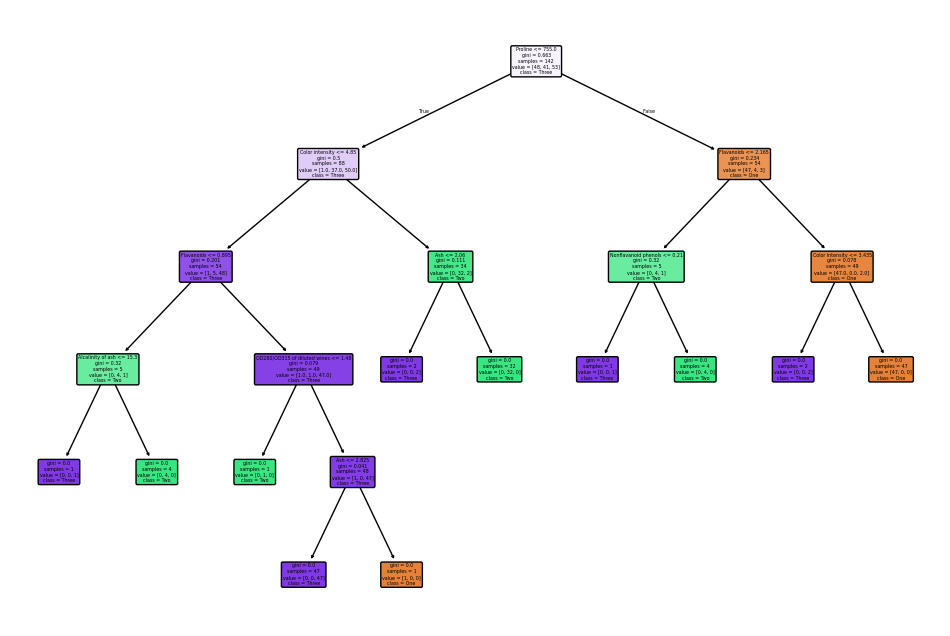

In [39]:
# Crear la gráfica del árbol
plt.figure(figsize=(12, 8))  # Ajustar tamaño de la figura
plot_tree(arbol,
          feature_names=feature_names,  # Nombres de las características
          class_names=target_names,     # Nombres de las clases
          filled=True,                       # Colorear nodos según clase
          rounded=True)                      # Bordes redondeados
plt.show()



# Random Forest en Machine Learning

Random Forest es un algoritmo de aprendizaje supervisado ampliamente utilizado en machine learning para tareas de clasificación y regresión. Es un método basado en el concepto de ensembles, donde combina múltiples árboles de decisión para mejorar la precisión y reducir problemas como el sobreajuste.

El algoritmo crea una gran cantidad de árboles de decisión durante el entrenamiento. Cada árbol se entrena con un subconjunto aleatorio de datos (usando bootstrap sampling) y selecciona un subconjunto aleatorio de características en cada división. Esta aleatoriedad introduce diversidad entre los árboles, lo que mejora la robustez del modelo. La predicción final se obtiene mediante:

    Clasificación: Votación mayoritaria entre los árboles.
    Regresión: Promedio de las predicciones individuales.

Las ventajas de Random Forest incluyen:

    Robustez frente al sobreajuste, ya que combina múltiples árboles que tienden a equilibrar errores.
    Escalabilidad para grandes conjuntos de datos y alta dimensionalidad.
    Capacidad para manejar características categóricas y numéricas.

Sin embargo, puede ser computacionalmente costoso para datasets muy grandes y menos interpretable que un solo árbol de decisión. Además, el número de árboles y otros hiperparámetros deben ser cuidadosamente ajustados para optimizar su rendimiento.

Es popular en aplicaciones como detección de fraudes, análisis financiero y diagnóstico médico debido a su alta precisión y flexibilidad.


In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
randomforest = RandomForestClassifier(n_estimators=100)
randomforest.fit(X_train,y_train)

RandomForestClassifier()

In [43]:
predicciones_rf = randomforest.predict(X_test)

In [44]:
print(classification_report(y_test,predicciones_rf))
print(confusion_matrix(y_test,predicciones_rf))

              precision    recall  f1-score   support

         One       1.00      0.91      0.95        11
       Three       1.00      1.00      1.00         7
         Two       0.95      1.00      0.97        18

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36

[[10  0  1]
 [ 0  7  0]
 [ 0  0 18]]


<ipython-input-49-e46bcce2d964>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


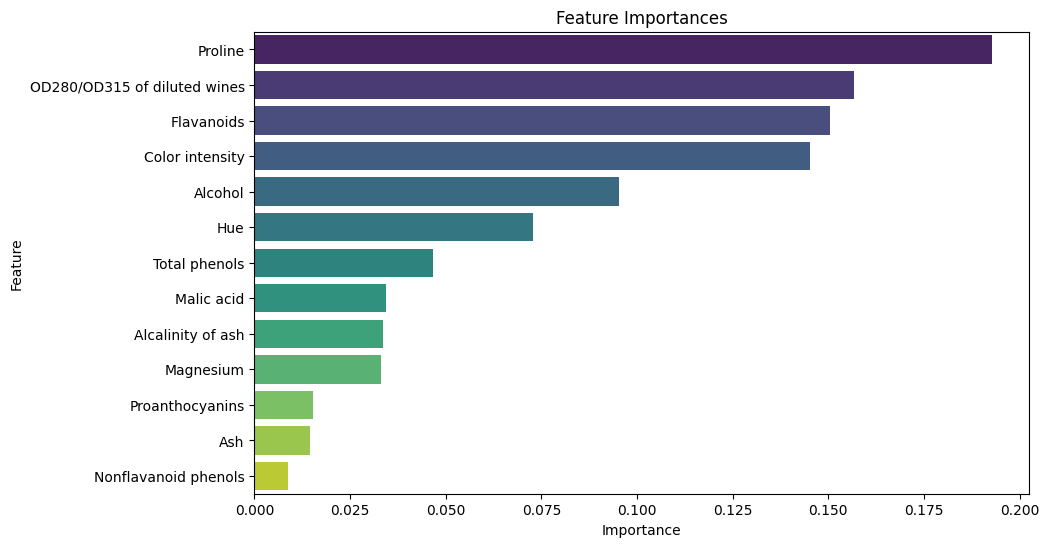

In [49]:
# Supongamos que randomforest es el modelo Random Forest ya entrenado
# Y tienes un DataFrame X con las características

# Crear un DataFrame para la importancia de las características
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': randomforest.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Graficar con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Curva ROC

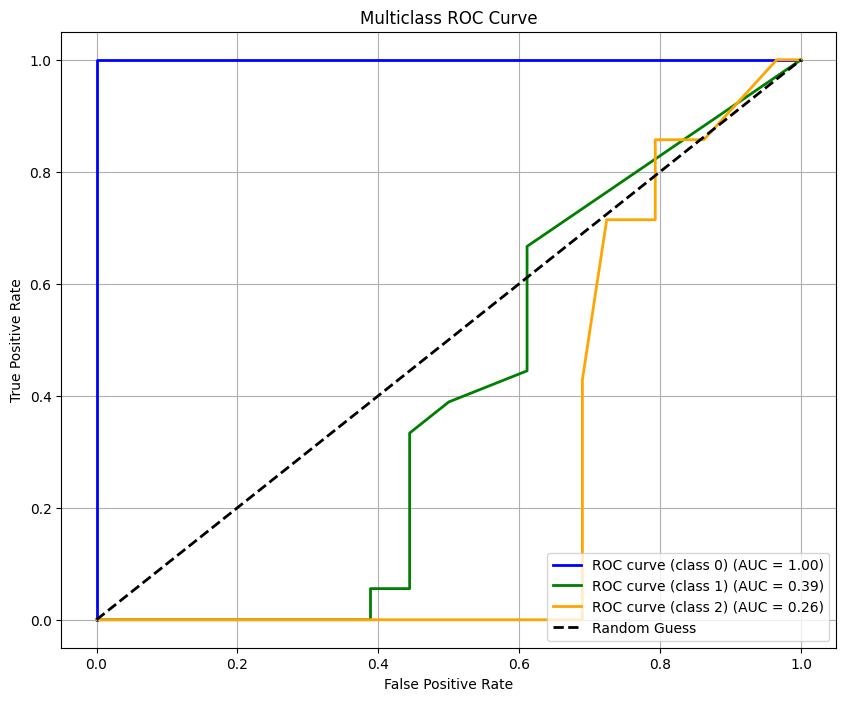

In [55]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarizar las etiquetas para problemas multiclase
y_test_bin = label_binarize(y_test, classes=['One', 'Two', 'Three'])
n_classes = y_test_bin.shape[1]

# Obtener las probabilidades predichas por el modelo
y_prob = randomforest.predict_proba(X_test)

# Calcular la curva ROC y el AUC para cada clase
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar las curvas ROC para cada clase
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'orange']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Guess')
plt.title('Multiclass ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

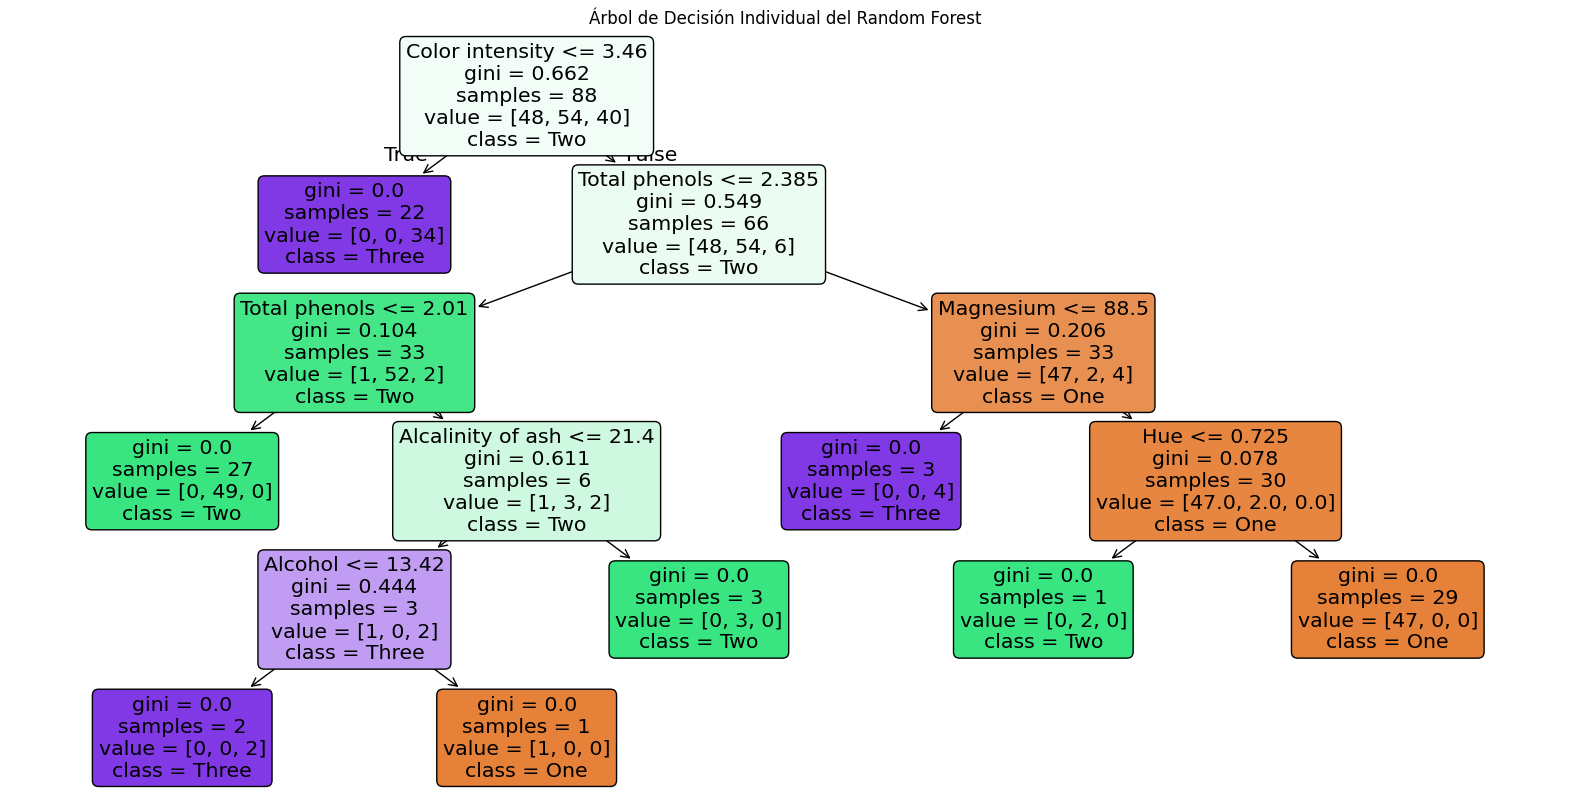

In [59]:
# Selecciona un árbol del Random Forest
estimator = randomforest.estimators_[0]  # Primer árbol del bosque

# Graficar el árbol
plt.figure(figsize=(20, 10))
plot_tree(estimator,
          feature_names=X.columns,  # Nombres de las características
          class_names=[str(cls) for cls in target_names],  # Nombres de las clases
          filled=True,
          rounded=True)
plt.title("Árbol de Decisión Individual del Random Forest")
plt.show()

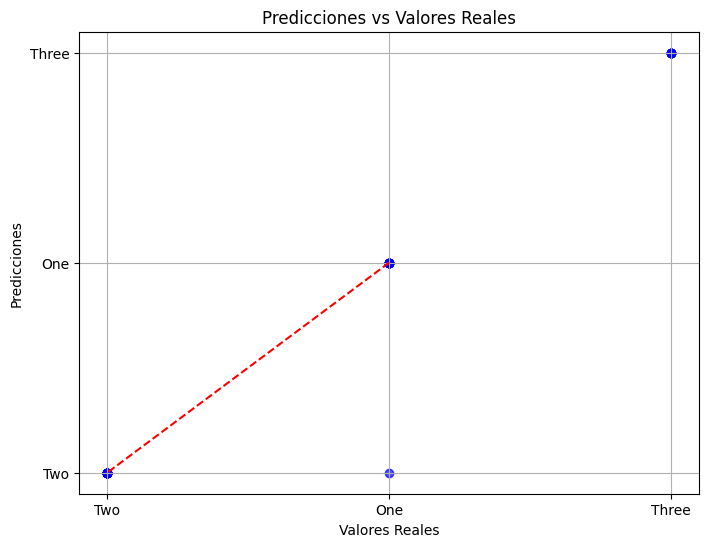

In [61]:
# Predicciones del modelo
y_pred = randomforest.predict(X_test)

# Graficar predicciones frente a valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.grid()
plt.show()